In [99]:
import pickle
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from scipy.stats import gaussian_kde

In [100]:
# General settings
import matplotlib as mpl
mpl.rc_file('/Users/ulyanadupletsa/Documents/PhDThesisPlots/matplotlibrc')


matplotlib.rc('xtick', labelsize = 16) 
matplotlib.rc('ytick', labelsize = 16)

In [101]:
mycolors = ['#f6b26b', '#f7cf4a', '#D2691E']

In [102]:
# load data
with open('data/o4a_spectral_posterior.pkl', 'rb') as f:
    pes = pickle.load(f)

with open('data/O3_icarogw_posterior.pkl', 'rb') as f:
    o3_pes = pickle.load(f)

In [103]:
ev_dictionary = ['LambdaCDM_MultiPop', 'LambdaCDM_MultiPeak', 'LambdaCDM_PLPeak']
lbs = ['Multi Pop', 'Multi Peak', 'Power Law + Peak']
lnstyle = ['solid', 'dashed', 'dotted']
myfontsize=18

In [104]:
#################### Values for Planck15 and SHOES

planck_h = 67.9 # From https://arxiv.org/pdf/1502.01589.pdf table IV column  TT+lowP+lensing+ext
sigma_planck_h = 0.55
riess_h = 74.03 # From the abstract of https://iopscience.iop.org/article/10.3847/1538-4357/ab1422
sigma_riess_h = 1.42
#################################################

In [105]:
h0_lbs = ['Planck', 'SHOES']
h0_mycolors = ['#2f4f4f', '#f6b26b']

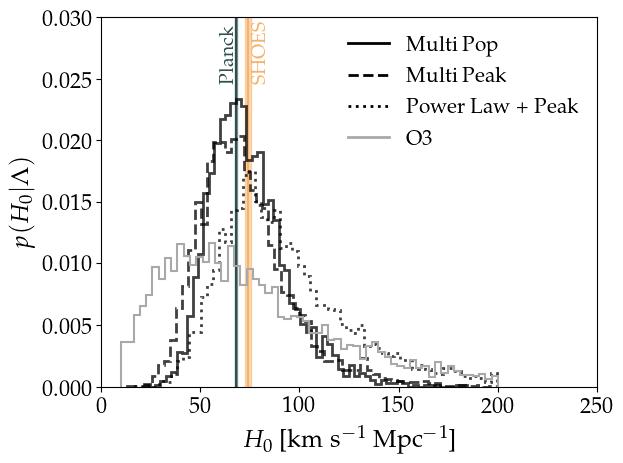

In [107]:
# plot histograms of posteriors on H0

mybins=60
my_lnw = 2.

fig, ax = plt.subplots(1, 1)

ax.axvline(planck_h,color='#2f4f4f')
ax.fill_betweenx([0,0.3],planck_h-sigma_planck_h,planck_h+sigma_planck_h,color='#2f4f4f',alpha=0.5)
ax.text(60, 0.025, 'Planck', rotation=90, fontsize=14, color='#2f4f4f')
ax.axvline(riess_h,color='#f6b26b')
ax.fill_betweenx([0,0.3],riess_h-sigma_riess_h,riess_h+sigma_riess_h,color='#f6b26b',alpha=0.5)
ax.text(76, 0.025, 'SHOES', rotation=90, fontsize=14, color='#f6b26b')

ax.set_xlabel('$H_0$ [km s$^{-1}$ Mpc$^{-1}$]', fontsize=myfontsize)
ax.set_ylabel('$p(H_0|\Lambda)$', fontsize=myfontsize)


xx = np.linspace(0, 200, 1_000)
for i, key in enumerate(ev_dictionary): 
    #kde = gaussian_kde(pes[key].posterior['H0'].to_numpy(), bw_method=0.15)
    ax.hist(pes[key].posterior['H0'].to_numpy(), color='black', bins=mybins, density=True, 
            linewidth=my_lnw, alpha=0.75, histtype='step', linestyle=lnstyle[i])

#kde = gaussian_kde(o3_pes['SNR_11_BBH-powerlaw-gaussian_w0flatLCDM']['H0'], bw_method=0.15)
ax.hist(o3_pes['SNR_11_BBH-powerlaw-gaussian_w0flatLCDM']['H0'], bins=mybins, density=True, 
        color='darkgray', linewidth=1.5, linestyle='solid', histtype='step')



ax.set_xlim(0, 250)
ax.set_ylim(0, 0.03)

custom_lines = [
    Line2D([0], [0], color='black', linestyle='solid', lw=2), 
    Line2D([0], [0], color='black', linestyle='dashed', lw=2),
    Line2D([0], [0], color='black', linestyle='dotted', lw=2),
    Line2D([0], [0], color='darkgray', linestyle='solid', lw=2) 
]

plt.legend(custom_lines, lbs + ['O3'], frameon=False, fontsize=myfontsize-3)

# Create patches for the legend
#patches = [mpatches.Patch(color=h0_mycolors[i], alpha=0.5, label=h0_lbs[i]) for i in range(len(h0_mycolors))]
#fig.legend(handles=patches, frameon=False,fontsize=myfontsize-3, ncol=3, bbox_to_anchor=(0.8,0.985))

plt.savefig('plots/h0_form_o4a_data.pdf', bbox_inches='tight')
plt.show()